In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os

# Insert your folder path below

In [2]:
myname = "srijit sen"
lib_path = "D:/MDS related Documents/Deep Learning/Assignment 1/"
os.chdir(lib_path)

In [3]:
# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 10
lr = 0.1
seed = 1
log_interval = 10

torch.manual_seed(seed)

# Data Loading module-  divided among 938 batches in training and sets of 1000 size batches in test

In [4]:
# Data loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('D:/MDS related Documents/Deep Learning/Assignment 1/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('D:/MDS related Documents/Deep Learning/Assignment 1/', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)

# Constructor call to initialize model parameters with sgd optimizer

In [5]:
# Model Initialization
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

# Per batch weight updation during training on average error across each batch

In [6]:
# Training function 
def train(epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        total_loss += loss.data
        loss.backward()
        optimizer.step()
#        if batch_idx % log_interval == 0:
#            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                epoch, batch_idx* len(data), len(train_loader.dataset),
#                100. * batch_idx / len(train_loader), loss.data))
    avg_loss = total_loss/(batch_idx+1)
    print('Train loss for epoch:{0}: {1}'.format(epoch, avg_loss))
    return avg_loss   

# Predicting for each 1000 size batch and calculating accuracy of each batch

In [7]:
# Test Function
def test():
    # TODO: Test the model on the test-set and report the loss and accuracy.
    tp = 0
    total = 0
    total_loss = 0
    
    # Loop through the test loader in batches of 1000
    for batch_idx, (test_data, test_target) in enumerate(test_loader):
        data, target = Variable(test_data), test_target
        #images, labels = Variable(images), Variable(labels)
        output = model(data)
        
        # Calculate NLL loss
        loss = F.nll_loss(output, Variable(target))

        # Add it to the total loss
        total_loss += loss.data
        
        # Calculate class predictions
        not_needed,prediction = torch.max(output.data, 1)
        batch_tp = (prediction == target).sum()
        #print('Batch correct: {0}, Batch size: {1}'.format(batch_corr, labels.size(0)))
        tp += batch_tp
        total += target.size(0)

    accuracy = 100*tp/total
    print('Accuracy: {:.2f}'.format(accuracy))
    avg_loss = total_loss/(batch_idx+1)
    print('Avg Test loss: {0}'.format(avg_loss))
    return avg_loss

train_loss = []
test_loss = []

In [8]:
# Main Function
train_loss = []
test_loss = []

for epoch in range(1, epochs + 1):
    train_loss.append(train(epoch))
    test_loss.append(test())

C:\Users\300063669\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train loss for epoch:1: 0.5150958299636841
Accuracy: 92.17
Avg Test loss: 0.2658715844154358
Train loss for epoch:2: 0.25065240263938904
Accuracy: 93.83
Avg Test loss: 0.20422570407390594
Train loss for epoch:3: 0.21290574967861176
Accuracy: 94.55
Avg Test loss: 0.18371513485908508
Train loss for epoch:4: 0.1927274912595749
Accuracy: 93.78
Avg Test loss: 0.20791184902191162
Train loss for epoch:5: 0.1794183999300003
Accuracy: 95.28
Avg Test loss: 0.16149592399597168
Train loss for epoch:6: 0.17298687994480133
Accuracy: 95.71
Avg Test loss: 0.1504252851009369
Train loss for epoch:7: 0.1644774228334427
Accuracy: 95.96
Avg Test loss: 0.13378272950649261
Train loss for epoch:8: 0.15473991632461548
Accuracy: 95.60
Avg Test loss: 0.15356414020061493
Train loss for epoch:9: 0.15164215862751007
Accuracy: 95.69
Avg Test loss: 0.14380013942718506
Train loss for epoch:10: 0.14965404570102692
Accuracy: 95.66
Avg Test loss: 0.15384455025196075


Text(0.5,1,'Plot of train and test loss on every epoch')

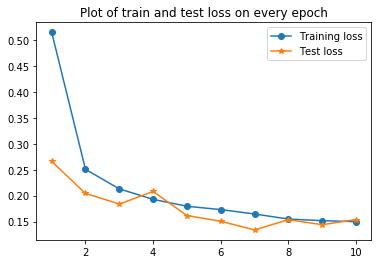

In [9]:
### Error Plot
plt.figure()
plt.plot(range(1, epochs+1), train_loss, '-o', label = "Training loss" )
plt.plot(range(1, epochs+1), test_loss, '-*', label = "Test loss")
plt.legend()
plt.title('Plot of train and test loss on every epoch')

# After a huge drop in 2nd epoch, the Error starts to saturate after epoch 9